<a href="https://colab.research.google.com/github/MohammedEhteshamAleem/Health_ChatBot/blob/main/Copy_of_Melanoma_Skin_Disease_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup and Import Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Split_smol"

In [ ]:
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

In [ ]:
# Print the paths to confirm they are correct

print("Base Directory:", base_dir)
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)

Base Directory: /content/drive/MyDrive/Split_smol
Train Directory: /content/drive/MyDrive/Split_smol/train
Validation Directory: /content/drive/MyDrive/Split_smol/val


**Training Data Preprocessing**

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Validation Data Preprocessing**

In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

**We use .flow_from_directory to load images and preprocess them.**

In [ ]:
#Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 224x224
    batch_size=32,           # Load 32 images per batch
    class_mode='categorical'      # For binary classification (melanoma vs non-melanoma)
)

Found 697 images belonging to 9 classes.


In [ ]:
#Validation Data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 181 images belonging to 9 classes.


[link text](https://)**Exploratory Data Analysis (EDA)**

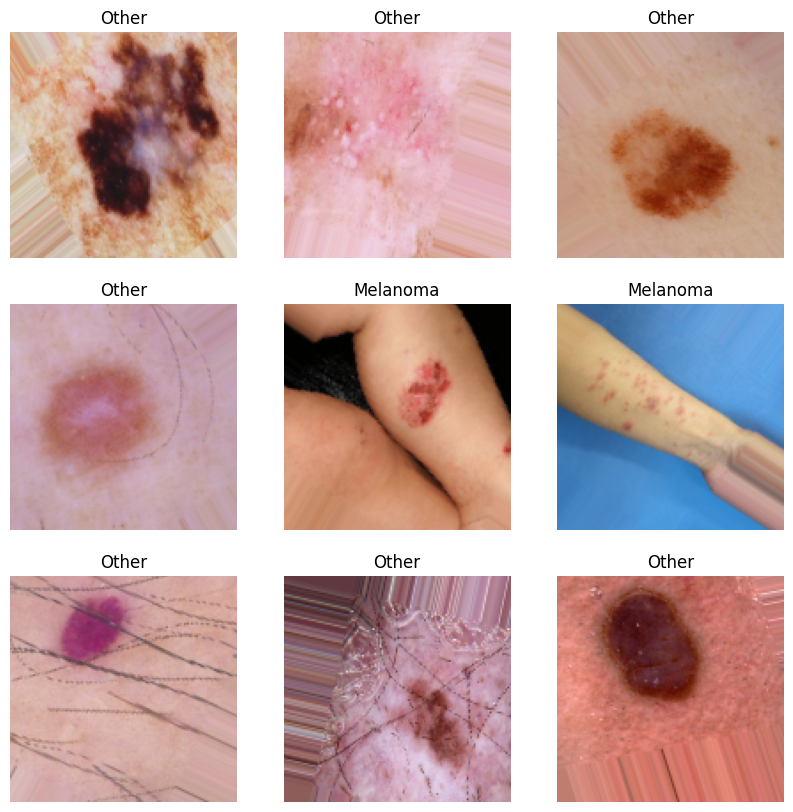

In [ ]:
def visualize_samples(generator):
    images, labels = next(generator)  # Load one batch of images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Plot 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title("Melanoma" if labels[i] == 1 else "Other")
        plt.axis("off")
    plt.show()

visualize_samples(train_generator)
#next(generator): Retrieves the next batch of images and their labels.
#plt.imshow: Displays the images.
#plt.title: Sets the title based on the label (1 = melanoma, 0 = other).

In [ ]:
# Check class distribution in the training set
print("Class labels:", train_generator.class_indices)
melanoma_count = len(os.listdir(os.path.join(train_dir, 'Melanoma')))
other_count = sum([len(files) for _, _, files in os.walk(train_dir)]) - melanoma_count
print(f"Melanoma Images: {melanoma_count}")
print(f"Other Images: {other_count}")


Class labels: {'Actinic keratosis': 0, 'Atopic Dermatitis': 1, 'Benign keratosis': 2, 'Dermatofibroma': 3, 'Melanocytic nevus': 4, 'Melanoma': 5, 'Squamous cell carcinoma': 6, 'Tinea Ringworm Candidiasis': 7, 'Vascular lesion': 8}
Melanoma Images: 80
Other Images: 617


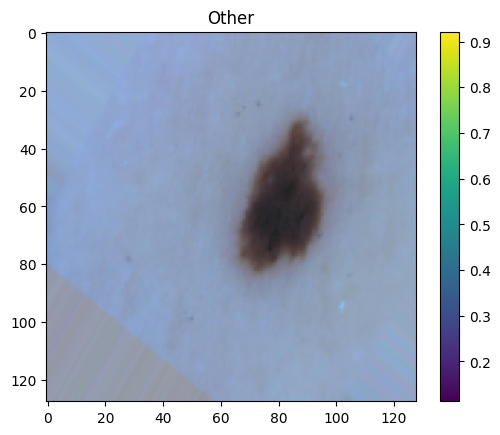

In [ ]:
# Visualize one preprocessed image
images, labels = next(train_generator)
plt.imshow(images[0])
plt.title("Melanoma" if labels[0] == 1 else "Other")
plt.colorbar()  # Show pixel intensity scale
plt.show()


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization,MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))


In [ ]:
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))


In [ ]:

# Third Convolutional Layer
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))


In [ ]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
#Fully Connected Layer
# Fully Connected Layer
cnn.add(Dense(units=256, activation='relu'))


In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [ ]:
#Compiling MOdel
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Define Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
cnn.fit(x= train_generator,validation_data=val_generator,epochs=25,callbacks=[early_stopping])

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1256 - loss: 2.3348 - val_accuracy: 0.2818 - val_loss: 2.0170
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3084 - loss: 1.8481 - val_accuracy: 0.3094 - val_loss: 1.7499
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3295 - loss: 1.6106 - val_accuracy: 0.3646 - val_loss: 1.6059
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4132 - loss: 1.5137 - val_accuracy: 0.4033 - val_loss: 1.6760
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3840 - loss: 1.5101 - val_accuracy: 0.4033 - val_loss: 1.5727
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4747 - loss: 1.3797 - val_accuracy: 0.4696 - val_loss: 1.4126
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4871 - loss: 1.2663 - val_accuracy: 0.4917 - val_loss: 1.2959
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5450 - loss: 1.2607 - val_accuracy: 0.5193 - val_loss:

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/ISIC_0000281.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Mellanoma'
else:
  prediction = 'Others'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
print(prediction)

Mellanoma


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/ISIC_0014568_downsampled.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Mellanoma'
else:
  prediction = 'Others'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
print(prediction)

Others
